In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [55]:
from sklearn.datasets import load_digits
from sklearn import metrics

In [56]:
digits = load_digits()
data = scale(digits.data)


In [57]:
print (data.shape)


(1797, 64)


Pixels from the square image of  8×8  pixels have been reshped in a row of  64  elements. Therefore, each row is an object or data. The characteristics or properties of each object are the gray intensities of each pixel. That is, we have, for each image,  64  properties.

To improve the visualization, we invert the colors

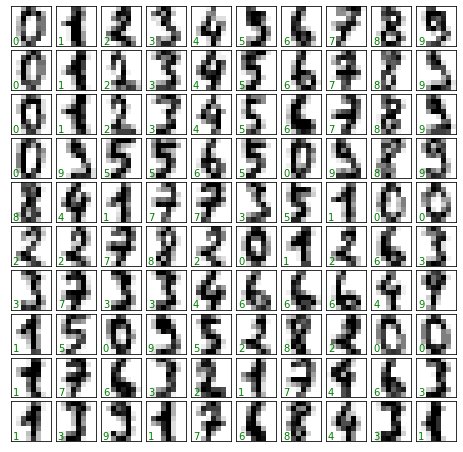

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [59]:
y = digits.target
y.shape

(1797,)

In [60]:
data = 255-data

k-Means on a randomly generated dataset
Lets create our own dataset for this lab!
First we need to set up a random seed. Use numpy's random.seed() function, where the seed will be set to 0

In [61]:
np.random.seed(1)

In [62]:
n=10

In [63]:
samples, features = data.shape

In [64]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

Setting up K-Means¶
Now that we have our random data, let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means.

In [65]:
k_means = KMeans(init="k-means++",n_clusters=n, n_init=10)
bench_k_means(k_means, "1", data)

1        	69944	0.618	0.674	0.644	0.484	0.641	0.146


Now let's fit the KMeans model with the feature matrix we created above, data

In [67]:
k_means.fit(data)

KMeans(n_clusters=10)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels

In [68]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 1, 1, ..., 1, 6, 6])

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers

In [69]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[255.        , 255.33501649, 256.02437757, 256.09167879,
        255.00658028, 255.66650548, 255.37796608, 255.12502292,
        255.05907756, 255.6220654 , 256.31278464, 254.59026484,
        255.35460773, 256.08114531, 255.35907629, 255.10041625,
        255.04462507, 255.57303154, 254.89673188, 254.22249554,
        255.3931211 , 255.43290747, 254.52916154, 254.71759063,
        255.03337973, 254.32000721, 254.12174302, 255.49872826,
        255.501169  , 254.51840484, 253.9924367 , 254.91543643,
        255.        , 253.1035735 , 253.87761607, 254.9668536 ,
        254.58279655, 254.05577043, 254.23138954, 255.        ,
        254.37665688, 253.20807131, 254.17792563, 254.14131021,
        253.83794572, 254.53974984, 255.3951674 , 255.08874162,
        254.7312117 , 254.70263802, 255.75796544, 255.2921848 ,
        254.13875026, 255.76654097, 255.75238405, 255.20978513,
        255.02359646, 255.27248219, 256.00781081, 255.95058477,
        254.92352693, 255.83814064, 255.

PCA allows to project the data from the original 64-dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.

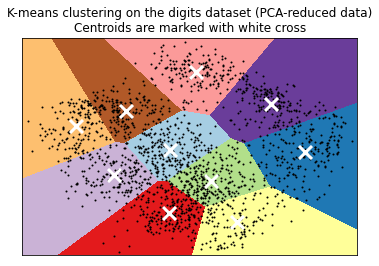

In [78]:
from sklearn.decomposition import PCA
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()